Data Wrangling II
Create an “Academic performance” dataset of students and perform the following operations using
Python.
    1. Scan all variables for missing values and inconsistencies. If there are missing values and/or inconsistencies, use any of the suitable techniques to deal with them.
    2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques to deal with them.
    3. Apply data transformations on at least one of the variables. The purpose of this transformation should be one of the following reasons: to change the scale for better understanding of the variable, to convert a non-linear relation into a linear one, or to decrease the skewness and convert the distribution into a normal distribution.
Reason and document your approach properly.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("/home/student/Documents/31170/A2/StudentsPerformance.csv")

In [3]:
df.shape

(1000, 8)

In [4]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    3
lunch                          0
test preparation course        0
math score                     1
reading score                  2
writing score                  0
dtype: int64

In [5]:
df.describe()

,math score,reading score,writing score
count,999.000000,998.000000,1000.000000
mean,66.093093,69.178357,68.054000
std,15.170122,14.611940,15.195657
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,57.750000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


In [6]:
mean_val = df['math score'].mean()

In [7]:
df['math score'].fillna((df['math score'].mean()), inplace=True)

In [8]:
mean_val = df['reading score'].mean()

In [9]:
df['reading score'].fillna((df['reading score'].mean()), inplace=True)

In [10]:
df['parental level of education'].fillna(df['parental level of education'].mode()[0], inplace=True)

In [11]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

<AxesSubplot:>

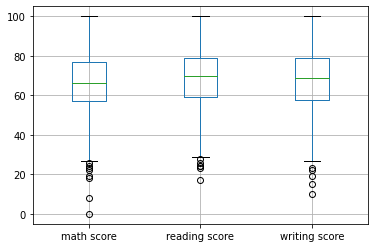

In [12]:
df.boxplot(['math score', 'reading score', 'writing score'])

In [13]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

math score       20.00
reading score    20.00
writing score    21.25
dtype: float64


In [14]:
print(df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))

     gender  lunch  math score  parental level of education  race/ethnicity  \
0     False  False       False                        False           False   
1     False  False       False                        False           False   
2     False  False       False                        False           False   
3     False  False       False                        False           False   
4     False  False       False                        False           False   
..      ...    ...         ...                          ...             ...   
995   False  False       False                        False           False   
996   False  False       False                        False           False   
997   False  False       False                        False           False   
998   False  False       False                        False           False   
999   False  False       False                        False           False   

     reading score  test preparation course  writin

/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.
/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.


TypeError: Cannot perform 'ror_' with a dtyped [bool] array and scalar of type [NoneType]

In [15]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.


In [16]:
df.shape

(988, 8)

<AxesSubplot:>

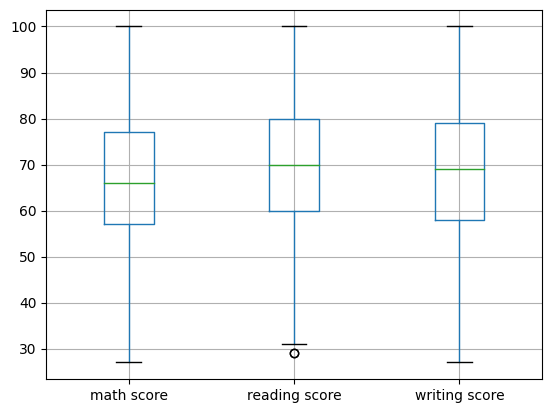

In [17]:
df.boxplot(['math score', 'reading score', 'writing score'])

In [18]:
df2 = df.iloc[:,[5,6,7]]

In [19]:
scaler = MinMaxScaler()

In [20]:
df2 = scaler.fit_transform(df2)

In [21]:
df2

array([[0.61643836, 0.6056338 , 0.64383562],
       [0.57534247, 0.85915493, 0.83561644],
       [0.8630137 , 0.92957746, 0.90410959],
       ...,
       [0.43835616, 0.5915493 , 0.52054795],
       [0.56164384, 0.69014085, 0.68493151],
       [0.68493151, 0.8028169 , 0.80821918]])

In [22]:
df.iloc[:,[5,6,7]] = df2

In [23]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,0.616438,0.605634,0.643836
1,female,group C,some college,standard,completed,0.575342,0.859155,0.835616
2,female,group B,master's degree,standard,none,0.863014,0.929577,0.904110
3,male,group A,associate's degree,free/reduced,none,0.273973,0.394366,0.232877
4,male,group C,some college,standard,none,0.671233,0.690141,0.657534
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,0.835616,0.985915,0.931507
996,male,group C,high school,free/reduced,none,0.479452,0.366197,0.383562
997,female,group C,high school,free/reduced,completed,0.438356,0.591549,0.520548
998,female,group D,some college,standard,completed,0.561644,0.690141,0.684932


In [24]:
le = LabelEncoder()

In [25]:
df['gender'] = le.fit_transform(df['gender'])

In [26]:
df['race/ethnicity'] = le.fit_transform(df['race/ethnicity'])

In [27]:
df['parental level of education'] = le.fit_transform(df['parental level of education'])

In [28]:
df['lunch'] = le.fit_transform(df['lunch'])

In [29]:
df['test preparation course'] = le.fit_transform(df['test preparation course'])

In [30]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,0.616438,0.605634,0.643836
1,0,2,4,1,0,0.575342,0.859155,0.835616
2,0,1,3,1,1,0.863014,0.929577,0.904110
3,1,0,0,0,1,0.273973,0.394366,0.232877
4,1,2,4,1,1,0.671233,0.690141,0.657534
...,...,...,...,...,...,...,...,...
995,0,4,3,1,0,0.835616,0.985915,0.931507
996,1,2,2,0,1,0.479452,0.366197,0.383562
997,0,2,2,0,0,0.438356,0.591549,0.520548
998,0,3,4,1,0,0.561644,0.690141,0.684932
